# Introduction


Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>

<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>


# Import Statements


In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.datasets import load_iris


# Read the Data

Download and add the .csv files to the same folder as your notebook.


In [8]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')
df_ue_2020 = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')

print(df_btc_search.head())
print(df_btc_price.head())

     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0


# Data Exploration


### Tesla


**Challenge**: <br>

<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>


<li>What are the shapes of the dataframes? </li>


In [13]:
df_tesla.shape

(124, 3)

In [14]:
df_btc_search.shape

(73, 2)

In [15]:
df_btc_price.shape

(2204, 3)

In [16]:
df_unemployment.shape

(181, 3)

<li>How many rows and columns? </li>
<li>df_tesla (124 rows, 3 columns)</li>
<li>df_btc_search(73 rows, 2 columns)</li>
<li>df_btc_price(2204 rows, 3 columns)</li>
<li>df_unemployment(181 rows, 3 columns)</li>


<li>What are the column names? </li>


In [19]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [20]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [21]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [22]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

<li>Complete the f-string to show the largest/smallest number in the search data column</li>


In [24]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [25]:
print(df_tesla.describe())
print(df_btc_price.describe())
print(df_btc_search.describe())
print(df_unemployment.describe())

       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007
              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000
       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std       

<li> What is the periodicity of the time series data (daily, weekly, monthly)?</li>


In [27]:
df_tesla.groupby('MONTH').count()



,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
MONTH,,
2010-06-01,1,1
2010-07-01,1,1
2010-08-01,1,1
2010-09-01,1,1
2010-10-01,1,1
...,...,...
2020-05-01,1,1
2020-06-01,1,1
2020-07-01,1,1


### Unemployment Data


In [29]:
df_ue_benefits = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')
df_ue_benefits.UE_BENEFITS_WEB_SEARCH.idxmax()
df_ue_benefits.loc[61]

MONTH                     2009-02
UE_BENEFITS_WEB_SEARCH        100
UNRATE                        8.3
Name: 61, dtype: object

In [30]:
df_ue_benefits = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_benefits.loc[df_ue_benefits.UE_BENEFITS_WEB_SEARCH.idxmax()]

MONTH                     2020-04
UE_BENEFITS_WEB_SEARCH        100
UNRATE                       14.7
Name: 195, dtype: object

In [32]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_ue_benefits.UE_BENEFITS_WEB_SEARCH.max() }')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin


In [34]:
df_bitcoin_trend = pd.read_csv('data/Bitcoin Search Trend.csv')
# df_bitcoin_trend.BTC_NEWS_SEARCH.idxmax()
df_bitcoin_trend.loc[df_bitcoin_trend.BTC_NEWS_SEARCH.idxmax()]
df_bitcoin_trend

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [35]:
df_daily_bitcoin_price = pd.read_csv('data/Daily Bitcoin Price.csv')
df_daily_bitcoin_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [36]:
print(f'largest BTC News Search: {df_bitcoin_trend.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning


### Check for Missing Values


**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?


In [40]:
print(df_tesla.isna().values.any())
print(df_unemployment.isna().values.any())
print(df_btc_search.isna().values.any())

False
False
False


In [41]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [42]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [43]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
print(df_btc_price[df_btc_price.CLOSE.isna()])

Number of missing values: 2
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


**Challenge**: Remove any missing values that you found.


In [45]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects


**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.


In [48]:
print(df_tesla.dtypes)
df_tesla['MONTH'] = df_tesla['MONTH'].apply(pd.to_datetime)
df_tesla.MONTH.head()

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object


0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [49]:
print(df_bitcoin_trend.dtypes)
df_bitcoin_trend['MONTH'] = df_bitcoin_trend['MONTH'].apply(pd.to_datetime)
df_bitcoin_trend.MONTH.head()

MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object


0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]

In [50]:
print(df_btc_price.dtypes)
df_btc_price['DATE'] = df_btc_price['DATE'].apply(pd.to_datetime)
df_btc_price.DATE.head()

DATE       object
CLOSE     float64
VOLUME    float64
dtype: object


0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]

In [51]:
print(df_unemployment.dtypes)
df_unemployment['MONTH'] = df_unemployment['MONTH'].apply(pd.to_datetime)
df_unemployment.MONTH.head()

MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object


0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>


In [53]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [54]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation


### Notebook Formatting & Style Helpers


In [57]:
# Create locators for ticks on the time axis
df_tesla.TSLA_USD_CLOSE
df_tesla['YEAR'] = df_tesla.MONTH
df_tesla['YEAR'] = df_tesla['YEAR'].dt.strftime('%Y')
df_tesla[df_tesla.YEAR == '2013']



,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE,YEAR
31,2013-01-01,3,7.502000,2013
32,2013-02-01,4,6.966000,2013
33,2013-03-01,4,7.578000,2013
34,2013-04-01,4,10.798000,2013
35,2013-05-01,6,19.552000,2013
36,2013-06-01,5,21.472000,2013
37,2013-07-01,5,26.856001,2013
38,2013-08-01,7,33.799999,2013
39,2013-09-01,6,38.674000,2013
40,2013-10-01,6,31.988001,2013


In [58]:
# Register date converters to avoid warning messages


### Tesla Stock Price v.s. Search Volume





**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.


<Figure size 1400x480 with 0 Axes>

<Figure size 640x800 with 0 Axes>

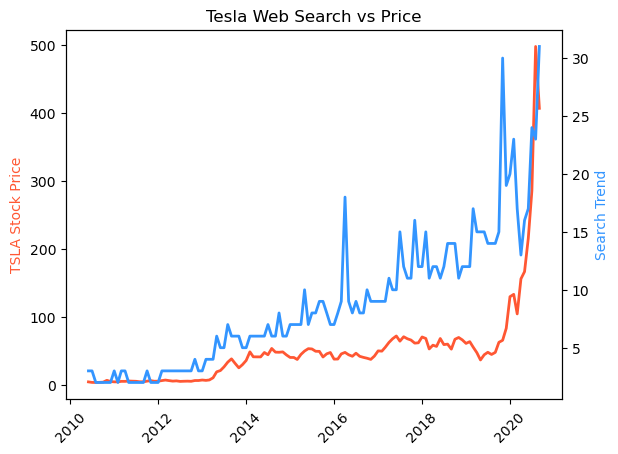

In [61]:
plt.figure().set_figwidth(14)
plt.figure().set_figheight(8)

fig, ax1 = plt.subplots();
ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,linewidth=2, color='#ff5733')
plt.xticks(rotation=45)
ax1.set_ylabel('TSLA Stock Price', color='#ff5733')
ax2 = ax1.twinx();
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH, linewidth=2 ,color='#3395ff')
ax2.set_ylabel('Search Trend',color='#3395ff', )
plt.title('Tesla Web Search vs Price')


plt.rc('xtick', labelsize=14)
plt.rc('axes', labelsize=10)


**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).


**Challenge**: Make the chart larger and easier to read.

1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.


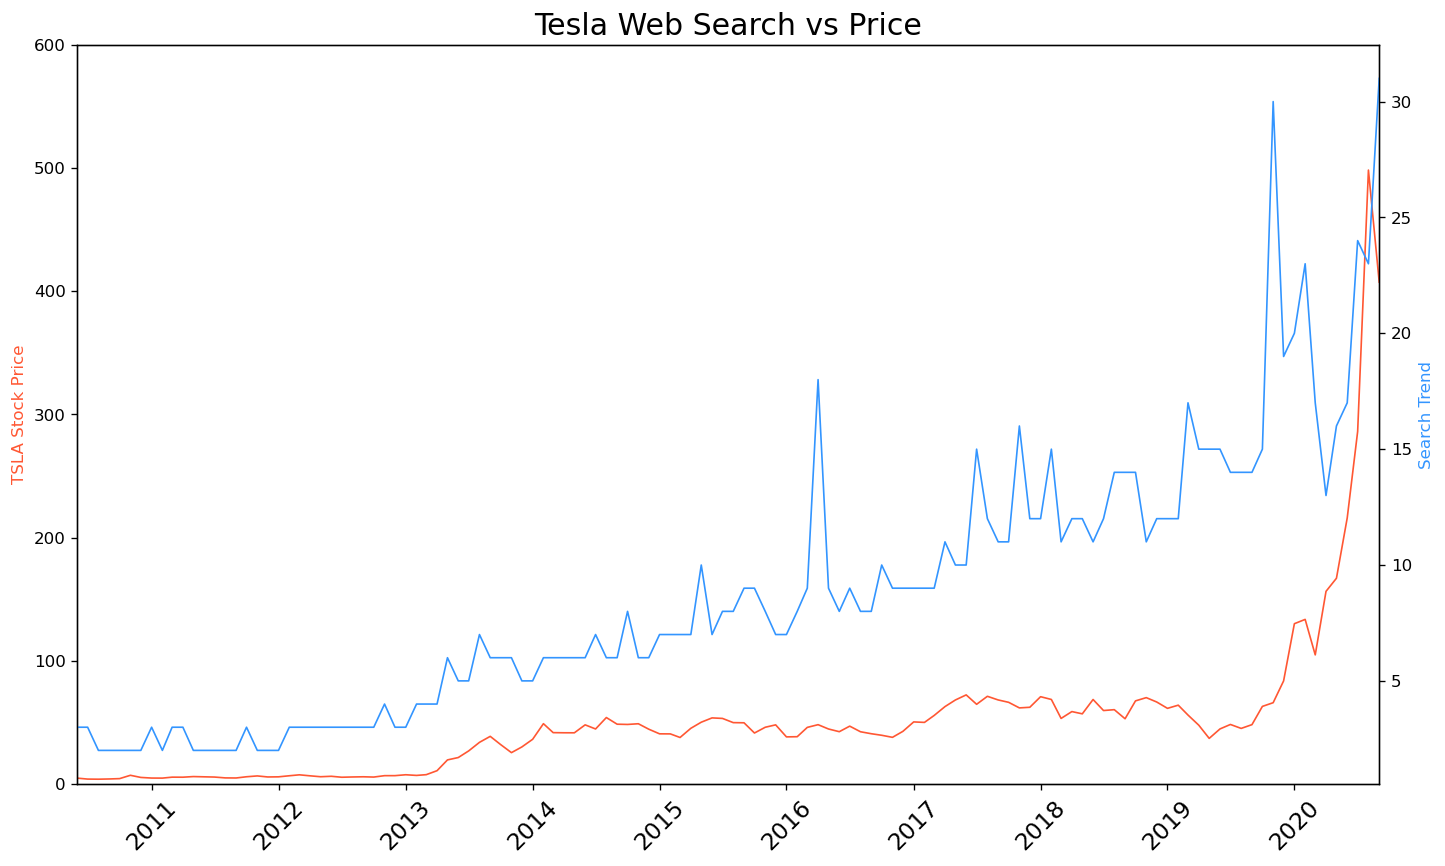

In [64]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(rotation=45)

ax1 = plt.gca()  
ax2 = ax1.twinx();

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,linewidth=1, color='#ff5733')
ax1.set_ylabel('TSLA Stock Price', color='#ff5733')
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH, linewidth=1 ,color='#3395ff')
ax2.set_ylabel('Search Trend',color='#3395ff' )
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
plt.rc('xtick', labelsize=14)
plt.rc('axes', labelsize=14)





How to add tick formatting for dates on the x-axis.


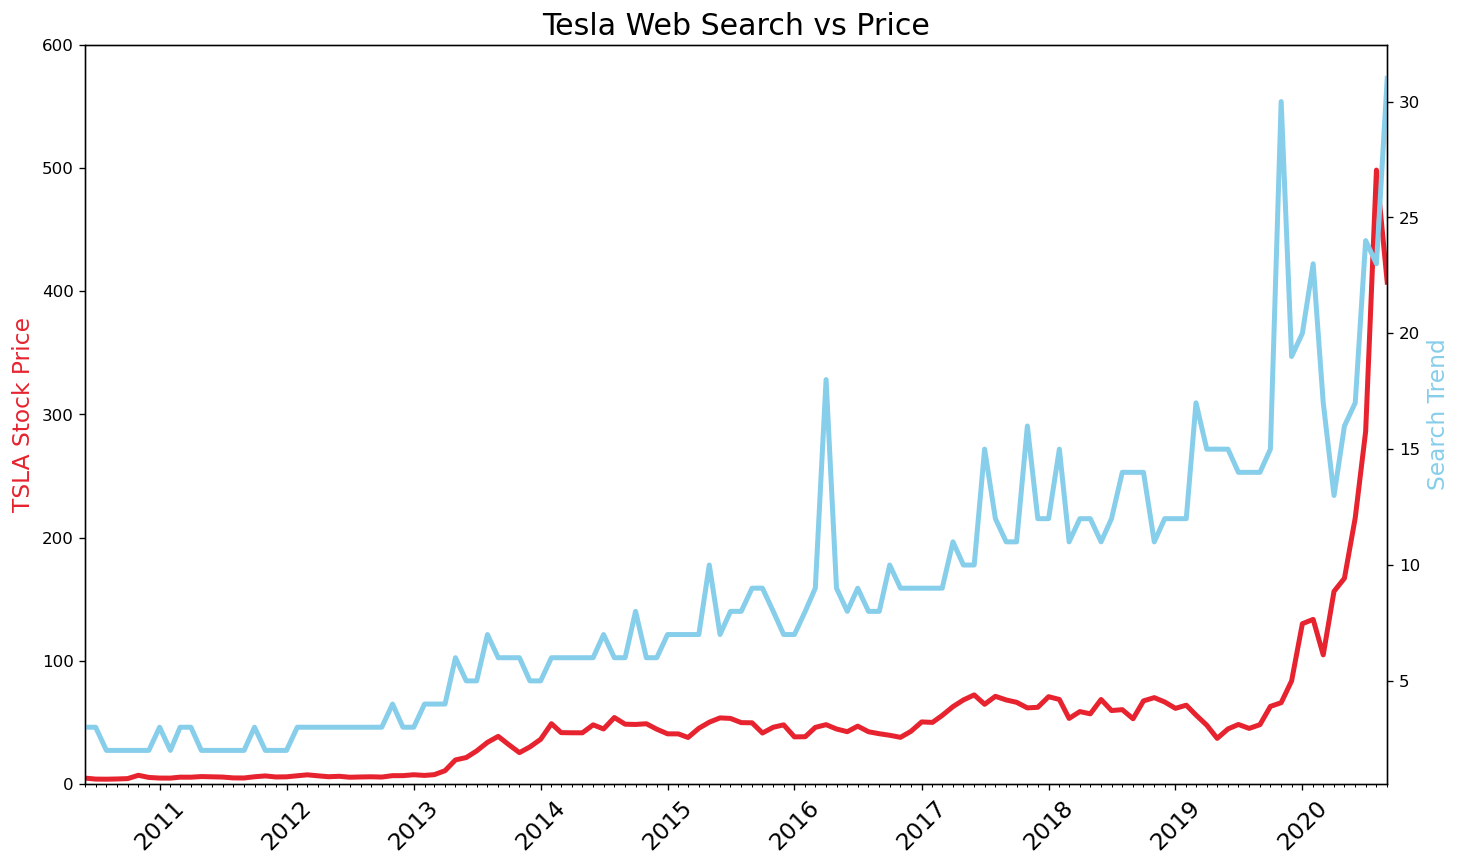

In [66]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()



### Bitcoin (BTC) Price v.s. Search Volume


**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>

1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?


In [69]:
print(df_btc_search.head())

print(df_btc_price.head())
print('******************************')
print('******************************')
print('******************************')

df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()
df_btc_monthly.to_csv('df_btc_monthly.csv')


     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
        DATE       CLOSE      VOLUME
0 2014-09-17  457.334015  21056800.0
1 2014-09-18  424.440002  34483200.0
2 2014-09-19  394.795990  37919700.0
3 2014-09-20  408.903992  36863600.0
4 2014-09-21  398.821014  26580100.0
******************************
******************************
******************************


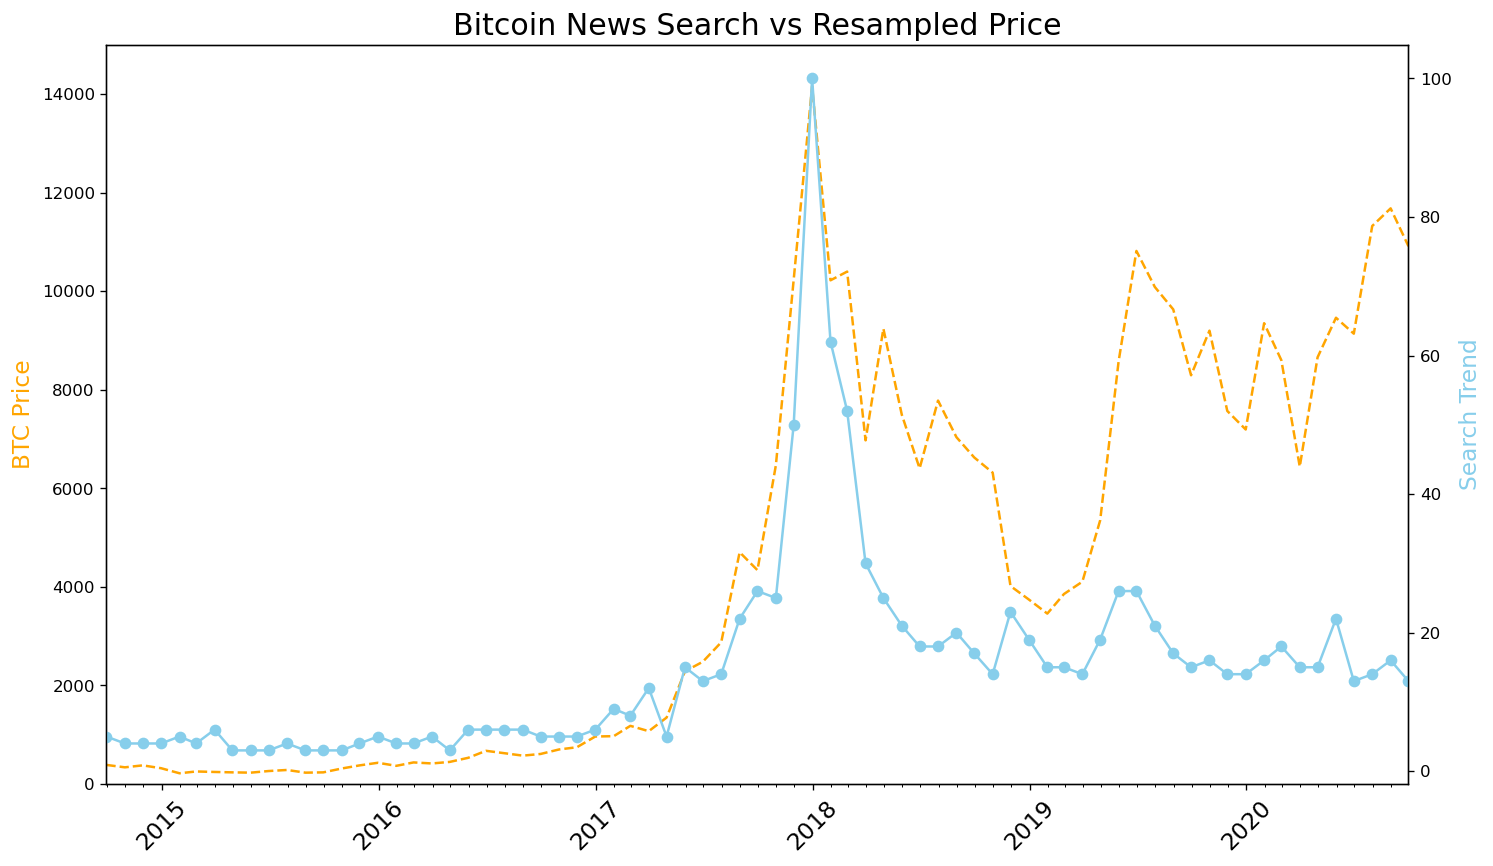

In [70]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='orange', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])


ax1.plot(df_btc_monthly.index,df_btc_monthly.CLOSE,color='orange',linestyle='dashed')
ax2.plot(df_btc_monthly.index,df_btc_search.BTC_NEWS_SEARCH, marker='o',  linestyle = '-', color='skyblue')



plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.


**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.

1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?


In [73]:
print(df_unemployment.describe())

                               MONTH  UE_BENEFITS_WEB_SEARCH      UNRATE
count                            181              181.000000  181.000000
mean   2011-07-02 01:51:22.872928256               35.110497    6.217680
min              2004-01-01 00:00:00               14.000000    3.700000
25%              2007-10-01 00:00:00               21.000000    4.700000
50%              2011-07-01 00:00:00               26.000000    5.400000
75%              2015-04-01 00:00:00               45.000000    7.800000
max              2019-01-01 00:00:00              100.000000   10.000000
std                              NaN               20.484925    1.891859


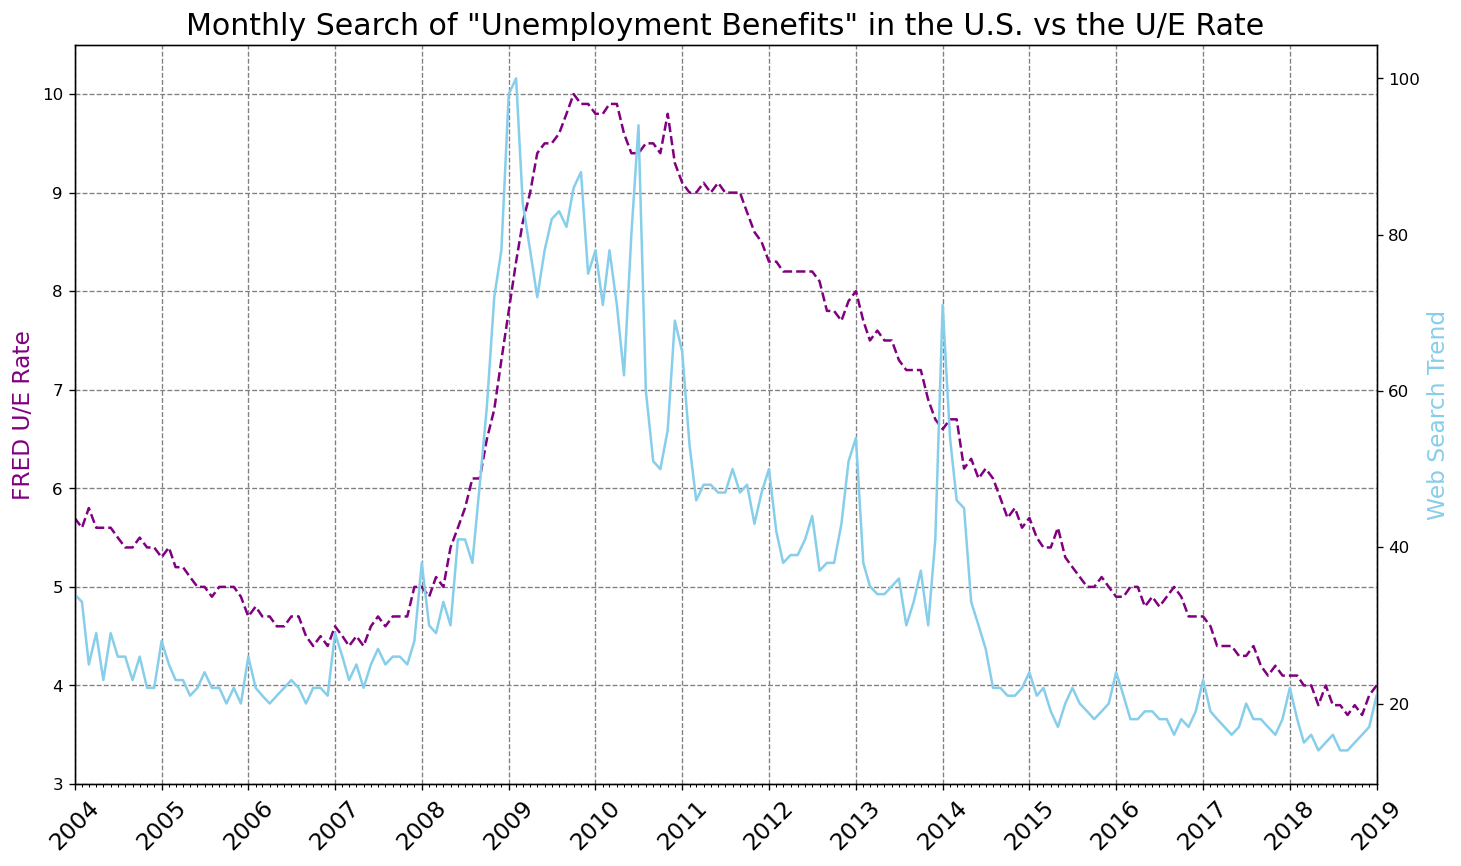

In [74]:
df_unemployment

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle='--')

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Web Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])


ax1.plot(df_unemployment.MONTH,df_unemployment.UNRATE,color='purple',linestyle='dashed')
ax2.plot(df_unemployment.MONTH,df_unemployment.UE_BENEFITS_WEB_SEARCH, linestyle = '-', color='skyblue')

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [76]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
print(df_unemployment.resample('2Q', on='MONTH',closed='left').last().rolling(window=1).mean())
print(roll_df.head(12))



            UE_BENEFITS_WEB_SEARCH  UNRATE
MONTH                                     
2004-06-30                    29.0     5.6
2004-12-31                    22.0     5.4
2005-06-30                    22.0     5.0
2005-12-31                    20.0     4.9
2006-06-30                    22.0     4.6
2006-12-31                    21.0     4.4
2007-06-30                    25.0     4.6
2007-12-31                    28.0     5.0
2008-06-30                    41.0     5.6
2008-12-31                    78.0     7.3
2009-06-30                    78.0     9.5
2009-12-31                    75.0     9.9
2010-06-30                    80.0     9.4
2010-12-31                    69.0     9.3
2011-06-30                    47.0     9.1
2011-12-31                    47.0     8.5
2012-06-30                    41.0     8.2
2012-12-31                    51.0     7.9
2013-06-30                    35.0     7.5
2013-12-31                    41.0     6.7
2014-06-30                    30.0     6.1
2014-12-31 

C:\Users\robin\AppData\Local\Temp\ipykernel_6356\3777364738.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  print(df_unemployment.resample('2Q', on='MONTH',closed='left').last().rolling(window=1).mean())


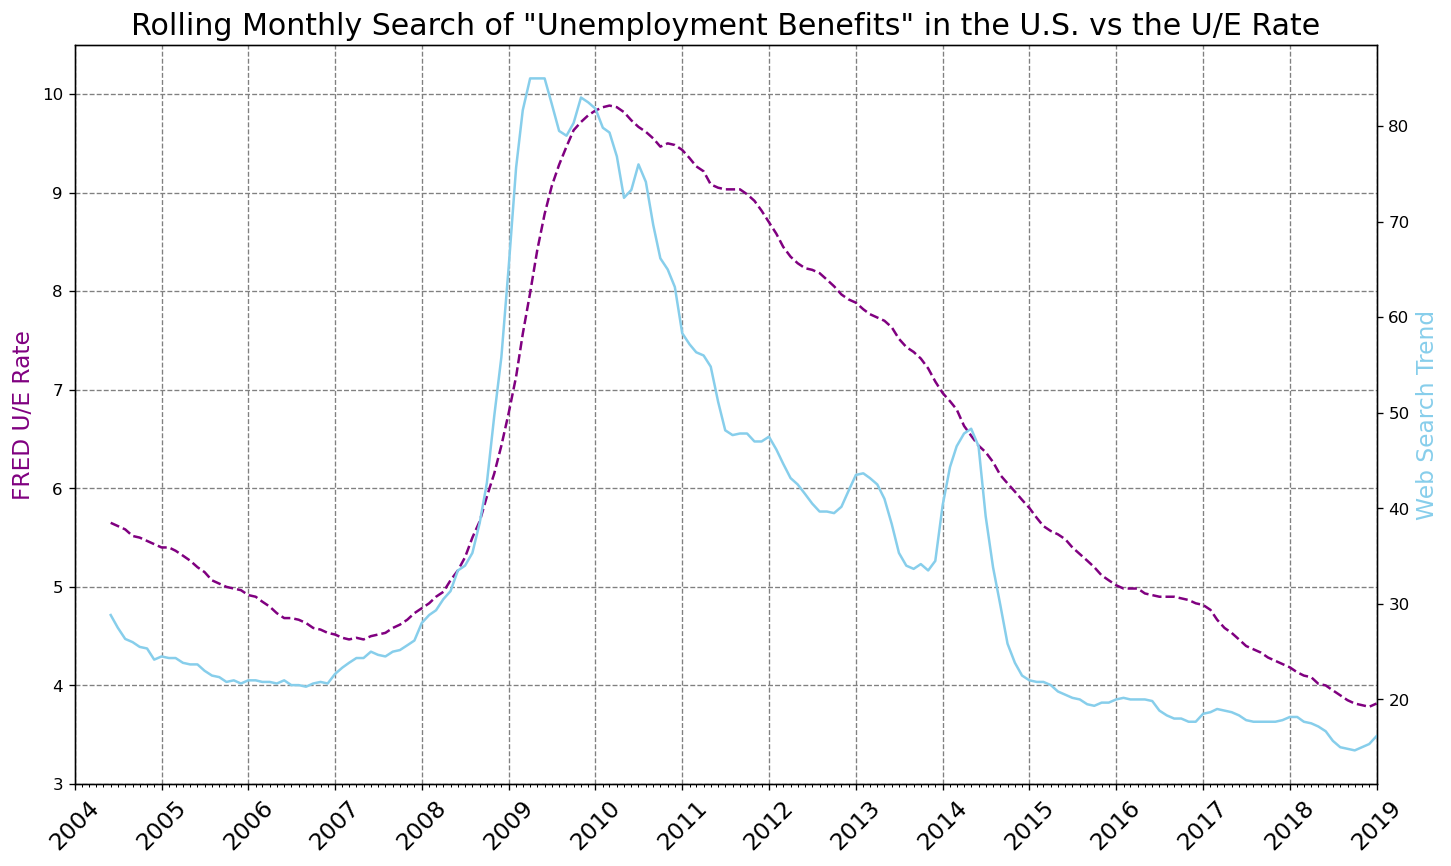

In [147]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle='--')

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Web Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])


ax1.plot(df_unemployment.MONTH,roll_df.UNRATE,color='purple',linestyle='dashed')
ax2.plot(df_unemployment.MONTH,roll_df.UE_BENEFITS_WEB_SEARCH, linestyle = '-', color='skyblue')

plt.show()


### Including 2020 in Unemployment Charts


**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?


In [153]:
df_ue_2020.MONTH = df_ue_2020['MONTH'].apply(pd.to_datetime)
df_ue_2020.describe()


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
count,200,200.000000,200.000000
mean,2012-04-16 05:02:24,10.315000,6.173000
min,2004-01-01 00:00:00,4.000000,3.500000
25%,2008-02-22 18:00:00,5.000000,4.600000
50%,2012-04-16 00:00:00,7.000000,5.400000
75%,2016-06-08 12:00:00,12.000000,7.825000
max,2020-08-01 00:00:00,100.000000,14.700000
std,NaN,10.778061,2.128267


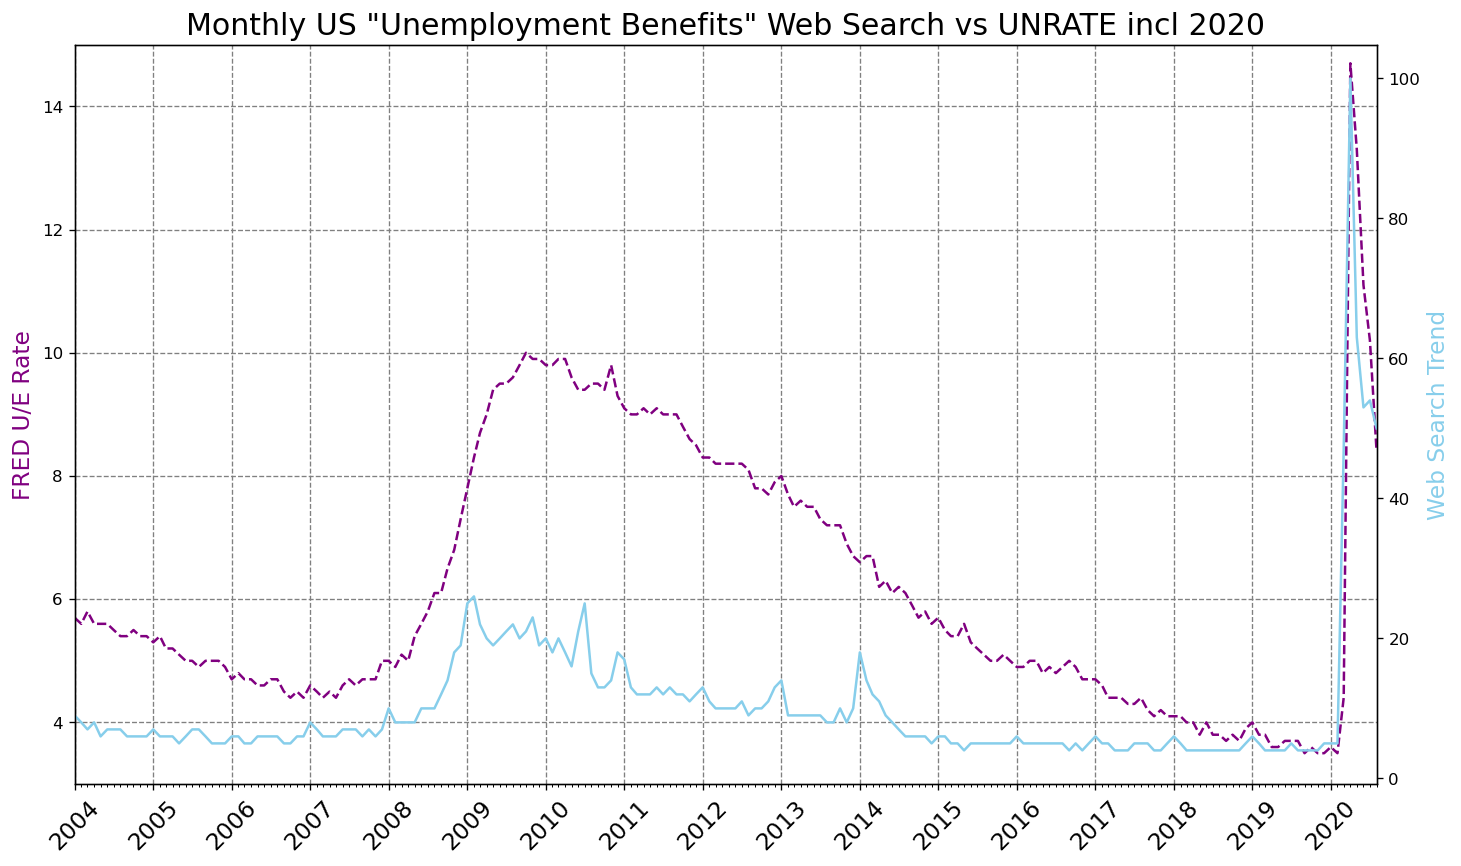

In [159]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle='--')

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Web Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=15)
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])


ax1.plot(df_ue_2020.MONTH,df_ue_2020.UNRATE,color='purple',linestyle='dashed')
ax2.plot(df_ue_2020.MONTH,df_ue_2020.UE_BENEFITS_WEB_SEARCH, linestyle = '-', color='skyblue')

plt.show()